# Sea Level: Permanent Service of Mean Sea Level 
Notebook for analysing tide measurement data for 1478 tide gauges worldwide. I use the Revised Local Reference (RLR) data set. The RLR datum is set to 7000 mm below mean sea level therefore the values are all in th range of 6000 to 8000 mm.

Data source is Permanent Service of Mean Sea Level (http://www.psmsl.org/data/obtaining/complete.php, RLR monthly)

Data set with monthly mean data.

Data has been obtained on 19 October 2016.

In [361]:
%matplotlib inline

from datetime import datetime
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['svg.fonttype'] = 'none'

Read data for all stations of PSMSL

In [364]:
#parse all meta data
stations_errorflag = 'data/psmsl_data/filelist.txt'

filelist = pd.read_csv(stations_errorflag, sep=';', header=None, usecols=[0, 6], names=['id', 'Latitude', 'Longitude', 'Locataion', 'Coastline', 'Station', 'Flag' ])

#parse all meta data
meta_info = 'data/metadata_psmsl.csv'

stations = pd.read_csv(meta_info)


stations = stations.merge(filelist, left_on='ID', right_on='id')

stations = stations.drop('ID', 1)

len(filelist)

1478

Read all the tide data from folder

In [363]:
#parse file

def parse_tides(filename):
    filepath = 'data/psmsl_data/' + str(filename) + '.rlrdata'
    df = pd.read_csv(filepath, sep=';', header=None, names=['year-month', 'tide', 'missing day', 'flag for attention'])

    df['flag for attention'] = df['flag for attention'].apply(lambda x: '{0:0>3}'.format(x))
    df['year'] = df['year-month'].apply(np.floor).astype('int')
    df['month'] = ((((df['year-month'] - df['year'])*24)+1)/2).apply(np.around).astype('int')
    df['day'] = 1 #due the monthly averages, no days are present, set days to 1
    df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')
    df['ID'] = filename
    df['ID'] = df['ID'].astype('int')

    df = df.drop('year-month', 1)
    df = df.drop('year', 1)
    df = df.drop('month', 1)
    df = df.drop('day', 1)
    
    print (filepath)
    
    return df

df = pd.concat([parse_tides(f) for f in stations['id']])

#replace null values

df['tide'] = df['tide'].replace("-99999",np.nan)

df['ID'].nunique()

data/psmsl_data/1578.rlrdata
data/psmsl_data/937.rlrdata
data/psmsl_data/647.rlrdata
data/psmsl_data/933.rlrdata
data/psmsl_data/658.rlrdata
data/psmsl_data/470.rlrdata
data/psmsl_data/1600.rlrdata
data/psmsl_data/2175.rlrdata
data/psmsl_data/1859.rlrdata
data/psmsl_data/546.rlrdata
data/psmsl_data/72.rlrdata
data/psmsl_data/1596.rlrdata
data/psmsl_data/722.rlrdata
data/psmsl_data/86.rlrdata
data/psmsl_data/1155.rlrdata
data/psmsl_data/1158.rlrdata
data/psmsl_data/731.rlrdata
data/psmsl_data/310.rlrdata
data/psmsl_data/445.rlrdata
data/psmsl_data/1438.rlrdata
data/psmsl_data/727.rlrdata
data/psmsl_data/1745.rlrdata
data/psmsl_data/1116.rlrdata
data/psmsl_data/1794.rlrdata
data/psmsl_data/367.rlrdata
data/psmsl_data/1007.rlrdata
data/psmsl_data/645.rlrdata
data/psmsl_data/8.rlrdata
data/psmsl_data/1799.rlrdata
data/psmsl_data/396.rlrdata
data/psmsl_data/362.rlrdata
data/psmsl_data/1628.rlrdata
data/psmsl_data/1109.rlrdata
data/psmsl_data/1367.rlrdata
data/psmsl_data/493.rlrdata
data/psm

1478

Merge meta data and tide data

In [258]:
df = df.merge(stations, left_on='ID', right_on='id')

df.head()

,tide,missing day,flag for attention,timestamp,ID,Location,Latitude,Longitude,GLOSS ID,Country,Date,Coastline,Station,id,Flag
0,6925.0,0,000,1983-01-01,1578,ZLARIN,43.7,15.667,NaN,HRV,31/05/1990,280,17,1578,N
1,7032.0,0,000,1983-02-01,1578,ZLARIN,43.7,15.667,NaN,HRV,31/05/1990,280,17,1578,N
2,6989.0,0,000,1983-03-01,1578,ZLARIN,43.7,15.667,NaN,HRV,31/05/1990,280,17,1578,N
3,7048.0,0,000,1983-04-01,1578,ZLARIN,43.7,15.667,NaN,HRV,31/05/1990,280,17,1578,N
4,7065.0,0,000,1983-05-01,1578,ZLARIN,43.7,15.667,NaN,HRV,31/05/1990,280,17,1578,N


Data flagged for attention: 001 means data should be treated with caution, 010 indicates a mean tidal level (MTL) value in am eans sea level (MSL) time series

In [259]:
df['ID'].nunique()

1478

In [260]:
df.Flag = df.Flag.str.strip()

df['missing day'] = df['missing day'].replace("99",np.nan)

data_flagged = df[(df['flag for attention'] == '001')]

#data_flagged.sort_values('missing day', ascending=False)


data_without_flag = df[df['flag for attention'].isin(['001']) == False]
data_without_flag = df[df['flag for attention'].isin(['011']) == False]

#data_without_flag.sort_values('flag for attention')

data_without_flag['ID'].nunique()

#89 Location sind geflaggt mit 001 und eine Location mit 011, gesamte Anzahl Location 1471

1478

In [261]:
plot_data = df[(df.timestamp.dt.year >= 1970)
              ].groupby(['Location', 'timestamp']).tide.mean().unstack().T.resample('1A').mean()

plot_data

Location,AARHUS,ABASHIRI,ABERDEEN I,ABIDJAN,ABURATSU,ABURATSUBO,ACAJUTLA,ACAJUTLA 2,ACAPULCO,ADAK SWEEPER COVE,...,YUZHNO KURILSK,ZADAR,ZAMBOANGA CITY,ZANZIBAR,ZEEBRUGGE,ZEMLIA BUNGE,ZHAPO,ZHELANIA II (ZHELANIA MYS),ZHOHOVA (ZHOHOVA OSTROV),ZLARIN
timestamp,,,,,,,,,,,,,,,,,,,,,
1970-12-31,7023.545455,7014.333333,7022.750000,NaN,6936.583333,6962.333333,6871.250000,NaN,7042.916667,7108.166667,...,7039.833333,NaN,NaN,NaN,6985.000000,6965.000000,6977.166667,6954.166667,6965.833333,NaN
1971-12-31,7054.000000,7002.555556,7004.166667,6973.416667,6943.750000,6977.500000,6894.000000,NaN,7070.666667,7068.833333,...,7035.666667,NaN,NaN,NaN,6945.250000,7013.333333,6996.666667,6980.000000,7004.166667,NaN
1972-12-31,6997.250000,7035.500000,7001.500000,NaN,6989.666667,7025.416667,7014.750000,NaN,7155.400000,7045.833333,...,7039.000000,NaN,NaN,NaN,6917.750000,7023.333333,6972.250000,6945.833333,6962.500000,NaN
1973-12-31,7041.166667,7030.166667,6960.363636,NaN,6959.750000,7009.750000,6853.416667,NaN,6994.583333,7056.833333,...,7069.833333,NaN,NaN,NaN,6964.916667,6995.833333,7025.833333,6985.000000,6885.833333,NaN
1974-12-31,7022.166667,7038.375000,6992.500000,6950.250000,6982.666667,6993.166667,6900.583333,NaN,7012.636364,7093.833333,...,7068.166667,NaN,NaN,NaN,6982.583333,6971.666667,7031.083333,6935.000000,6958.333333,NaN
1975-12-31,7019.666667,6989.272727,6937.818182,6952.250000,6997.000000,7012.833333,6887.250000,NaN,7011.250000,7051.583333,...,7024.000000,NaN,NaN,NaN,6959.833333,7105.000000,6977.666667,6987.500000,7008.333333,NaN
1976-12-31,6979.833333,7031.545455,NaN,7036.333333,6929.000000,7030.750000,6953.833333,NaN,7102.666667,7078.750000,...,7020.666667,NaN,NaN,NaN,6936.250000,7042.500000,6990.083333,6937.500000,6957.500000,NaN
1977-12-31,6997.083333,6993.500000,NaN,NaN,6946.750000,7003.416667,6913.750000,NaN,7096.833333,7195.000000,...,7018.166667,NaN,NaN,NaN,6977.916667,6993.333333,6948.750000,6878.333333,6938.333333,NaN
1978-12-31,7003.250000,7013.083333,NaN,NaN,6936.916667,7031.363636,6931.000000,NaN,7052.916667,NaN,...,7014.000000,NaN,NaN,NaN,NaN,7010.000000,7001.333333,6960.833333,6955.000000,NaN


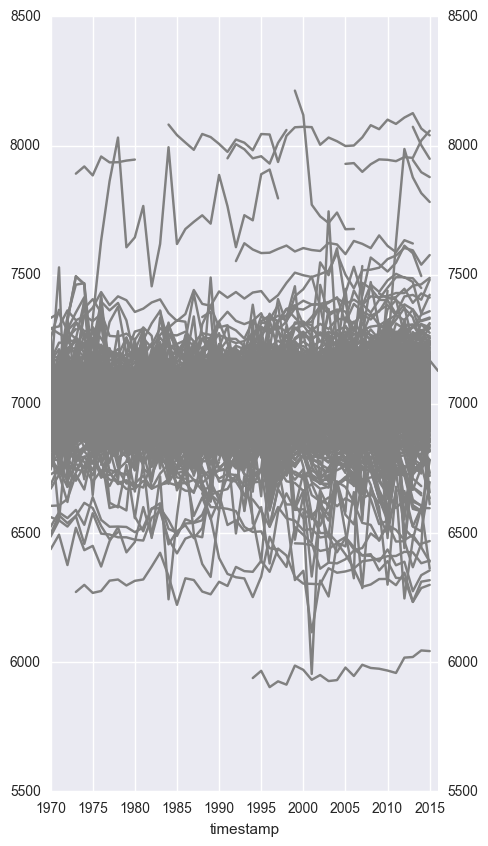

In [262]:
fig  = plt.figure(figsize=(5, 10))
ax = plt.subplot(111)

plot_data.plot(ax=ax, color='gray', legend=False)
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

In [295]:
first_measurement = df.groupby(['Location', 'Country']).timestamp.first()
stations_1900 = first_measurement[first_measurement.dt.year <= 1900]
stations_1925 = first_measurement[first_measurement.dt.year <= 1925]
stations_1950 = first_measurement[first_measurement.dt.year <= 1950] 
stations_1975 = first_measurement[first_measurement.dt.year <= 1975]
stations_1990 = first_measurement[first_measurement.dt.year <= 1990]
stations_2000 = first_measurement[first_measurement.dt.year <= 2000]
stations_2010 = first_measurement[first_measurement.dt.year <= 2010]
stations_2014 = first_measurement[first_measurement.dt.year <= 2014]
# stations_1970
#first_measurement.sort_values()
stations_1900.sort_values().head(20)

stations_hist = pd.Series([len(stations_1900), len(stations_1925), len(stations_1950), len(stations_1975), len(stations_2000), len(stations_2014)],
                          index=['<1900', '<1925', '<1950', '<1975', '<2000', '<2014'])

stations_hist

first_measurement.dt.year

Location                     Country
AARHUS                       DNK        1888
ABASHIRI                     JPN        1965
ABERDEEN I                   GBR        1931
ABERDEEN II                  GBR        1862
ABIDJAN                      CIV        1971
ABURATSU                     JPN        1960
ABURATSUBO                   JPN        1930
ACAJUTLA                     SLV        1962
ACAJUTLA 2                   SLV        2011
ACAPULCO                     MEX        1967
ADAK SWEEPER COVE            USA        1943
ADEN                         YEM        1879
AGUADILLA                    PRI        2006
AION                         RUS        1954
AJACCIO                      FRA        1981
AKKO                         ISR        2012
AKUNE                        JPN        1970
AKYAB                        MMR        1937
ALAMEDA (NAVAL AIR STATION)  USA        1939
ALAMITOS BAY ENTRANCE        USA        1953
ALBANY                       AUS        1987
ALCUDIA           

In [352]:
#function that evaluates how many empty values a stations has and start and end of each station

def empty_values(dataframe):
    
    station = dataframe.set_index('timestamp').tide.resample('1A').mean()
    
    first_year = station.first_valid_index().year
    last_year = station.last_valid_index().year
    count_missing = station.isnull().sum()
    count_values = station.count()
    tide_first = station.iloc[0]
    
    station = station.sort_values(ascending=False)
    tide_last = station.iloc[0]
    tide_change = tide_last - tide_first
    
    result = {}

    result['Start'] = first_year
    result['End'] = last_year
    result['Valid Data Points'] = count_values
    result['Missing Data Points'] = count_missing
    result['Tide Change'] = tide_change
    return pd.Series(result)

clean_data = df.groupby(['Location', 'Country']).apply(empty_values).sort_values('Valid Data Points', ascending=False)

clean_data = clean_data.reset_index()

clean_data_subset = clean_data[(clean_data['Start'] <= 1950)
                               & (clean_data['Missing Data Points'] <= 20) 
                               & (clean_data['End'] >= 2000) ]

clean_data_subset.sort_values('Start')

#clean_data_subset['Tide Change'].min()


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Location,Country,End,Missing Data Points,Start,Tide First,Tide Last,Valid Data Points,Tide Change
0,BREST,FRA,2015.0,19.0,1807.0,6970.333333,7198.250000,190.0,227.916667
3,CUXHAVEN 2,DEU,2010.0,0.0,1843.0,6831.750000,7216.250000,168.0,384.500000
2,MAASSLUIS,NLD,2015.0,0.0,1848.0,6672.083333,6983.000000,168.0,310.916667
4,WISMAR 2,DEU,2014.0,0.0,1848.0,6949.166667,7159.750000,167.0,210.583333
5,SAN FRANCISCO,USA,2015.0,0.0,1854.0,6949.833333,7224.333333,162.0,274.500000
6,WARNEMUNDE 2,DEU,2015.0,0.0,1855.0,6924.111111,7206.500000,161.0,282.388889
14,NEW YORK ( THE BATTERY),USA,2015.0,15.0,1856.0,6697.500000,7185.333333,145.0,487.833333
12,TRAVEMUNDE,DEU,2014.0,8.0,1856.0,6824.000000,7120.500000,151.0,296.500000
7,VLISSINGEN,NLD,2015.0,0.0,1862.0,6786.666667,6975.583333,154.0,188.916667
8,HOEK VAN HOLLAND,NLD,2015.0,0.0,1864.0,6542.500000,6994.250000,152.0,451.750000


In [323]:
df

,tide,missing day,flag for attention,timestamp,ID,Location,Latitude,Longitude,GLOSS ID,Country,Date,Coastline,Station,id,Flag
0,6925.0,0.0,000,1983-01-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N
1,7032.0,0.0,000,1983-02-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N
2,6989.0,0.0,000,1983-03-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N
3,7048.0,0.0,000,1983-04-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N
4,7065.0,0.0,000,1983-05-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N
5,6954.0,0.0,000,1983-06-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N
6,6985.0,2.0,000,1983-07-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N
7,6978.0,0.0,000,1983-08-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N
8,6984.0,0.0,000,1983-09-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N
9,6959.0,0.0,000,1983-10-01,1578,ZLARIN,43.700,15.667,NaN,HRV,31/05/1990,280,17,1578,N


# Iceland

In [89]:
data_ISL = df[(df.Country == 'ISL')].groupby(['Location', 'timestamp']).tide.mean().unstack().T
data_ISL.head()

Location,GRINDAVIK,REYKJAVIK
timestamp,,
1956-05-01,NaN,6980.0
1956-06-01,NaN,6840.0
1956-07-01,NaN,6890.0
1956-08-01,NaN,6830.0
1956-09-01,NaN,6830.0


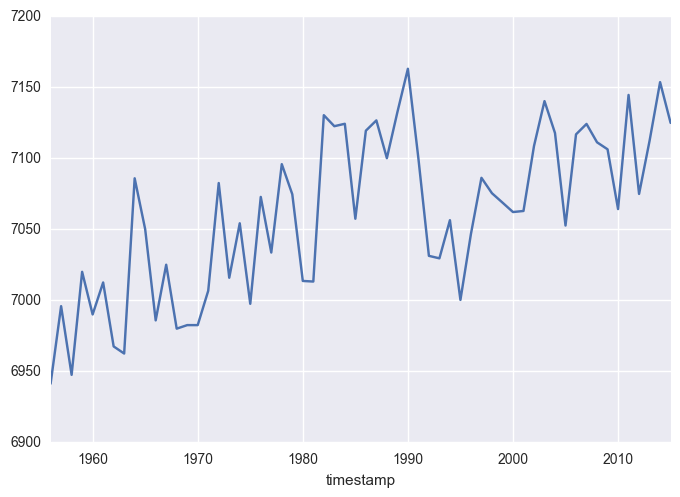

In [90]:
df[df.Location == 'REYKJAVIK'].set_index('timestamp').tide.resample('1A').mean().plot()

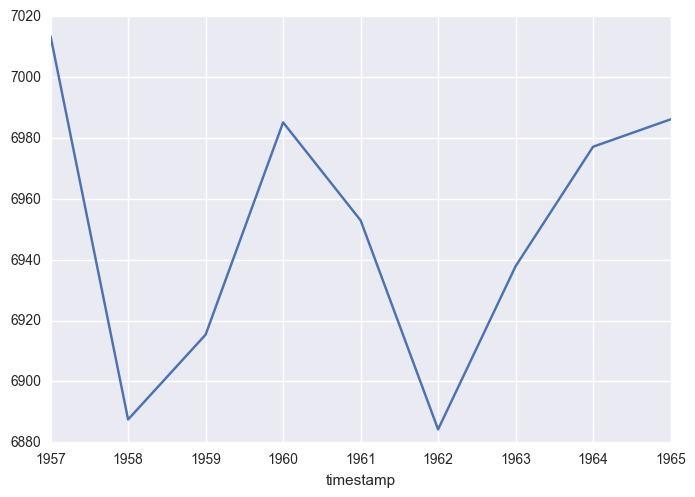

In [91]:
df[df.Location == 'GRINDAVIK'].set_index('timestamp').tide.resample('1A').mean().plot()

# Philippines
26 tide gauges in the Philippines.

In [104]:
data_PHL = df[(df.Country == 'PHL')]

first_measurement_PHL = data_PHL.groupby(['Location']).timestamp.first()

first_measurement_PHL.sort_values().head(10)

Location
MANILA, S. HARBOR        1901-03-01
CEBU                     1935-05-01
LEGASPI, ALBAY           1947-05-01
JOLO, SULU               1947-11-01
DAVAO, DAVAO GULF        1948-03-01
SAN FERNANDO, LA UNION   1948-04-01
TACLOBAN, LEYTE          1951-06-01
PORT IRENE               1987-02-01
SURIGAO                  1987-05-01
SAN JOSE                 1988-01-01
Name: timestamp, dtype: datetime64[ns]

timestamp
1940-12-31    7133.166667
1941-12-31    7120.750000
1942-12-31    7077.333333
1943-12-31    7045.500000
1944-12-31    7040.083333
Freq: A-DEC, Name: tide, dtype: float64

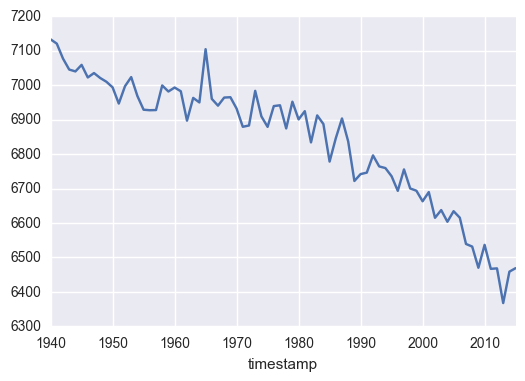

In [354]:
df[df.Location == 'YAKUTAT'].set_index('timestamp').tide.resample('1A').mean().plot()
df[df.Location == 'YAKUTAT'].set_index('timestamp').tide.resample('1A').mean().head()


timestamp
1915-12-31    6996.375000
1916-12-31    6973.833333
1917-12-31    6922.333333
1918-12-31    6944.666667
1919-12-31    6944.000000
1920-12-31    6958.333333
1921-12-31    6916.000000
1922-12-31    6945.166667
1923-12-31    6928.500000
1924-12-31    6983.583333
Freq: A-DEC, Name: tide, dtype: float64

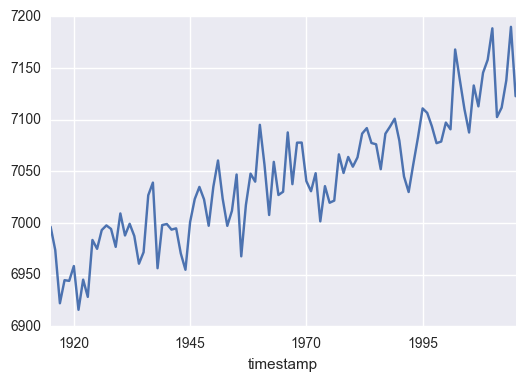

In [360]:
#Newlyn

newlyn = df[df.Location == 'NEWLYN'].set_index('timestamp').tide.resample('1A').mean()

newlyn_pct = newlyn.pct_change()

newlyn_diff = newlyn.diff(1)

newlyn.plot()

newlyn.head(10)